In [59]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [60]:
WaterData = pd.read_csv('water_dataX.csv', encoding='unicode_escape')



In [61]:
WaterData.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [62]:
WaterData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [63]:
WaterData.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [64]:
# Conversions
# Converting all non-numeric values to NaN
WaterData['Temp'] = pd.to_numeric(WaterData['Temp'], errors='coerce')
WaterData['D.O. (mg/l)'] = pd.to_numeric(WaterData['D.O. (mg/l)'], errors='coerce')
WaterData['PH'] = pd.to_numeric(WaterData['PH'], errors='coerce')
WaterData['B.O.D. (mg/l)'] = pd.to_numeric(WaterData['B.O.D. (mg/l)'], errors='coerce')
WaterData['NITRATENAN N+ NITRITENANN (mg/l)'] = pd.to_numeric(WaterData['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
WaterData['TOTAL COLIFORM (MPN/100ml)Mean'] = pd.to_numeric(WaterData['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')
WaterData.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)              object
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [65]:
WaterData.isna()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,False,False,False,True,False,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False,False,False,False,False,False
1988,False,False,False,False,False,False,False,False,True,False,False,False
1989,False,False,False,False,False,False,False,False,True,False,False,False


In [66]:
WaterData = WaterData.dropna()


In [67]:
WaterData.isna()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,False,False,False,False,False,False,False,False,False,False,False,False
1982,False,False,False,False,False,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
WaterData.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003


In [69]:
WaterData.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81,1.5,0.1,2853,4049.0,2014


In [70]:
start = 2
end = 1779

station = WaterData.iloc[start:end, 0]
location = WaterData.iloc[start:end, 1]
state = WaterData.iloc[start:end, 2]
do = WaterData.iloc[start:end, 4].astype(np.float64)
value = 0
ph = WaterData.iloc[start:end, 5]
co = WaterData.iloc[start:end, 6].astype(np.float64)

year = WaterData.iloc[start:end, 11]
tc = WaterData.iloc[2:end, 10].astype(np.float64)

bod = WaterData.iloc[start:end, 7].astype(np.float64)
na = WaterData.iloc[start:end, 8].astype(np.float64)
na.dtype

dtype('float64')

In [71]:
WaterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 1 to 1987
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1601 non-null   object 
 1   LOCATIONS                         1601 non-null   object 
 2   STATE                             1601 non-null   object 
 3   Temp                              1601 non-null   float64
 4   D.O. (mg/l)                       1601 non-null   float64
 5   PH                                1601 non-null   float64
 6   CONDUCTIVITY (µmhos/cm)           1601 non-null   object 
 7   B.O.D. (mg/l)                     1601 non-null   float64
 8   NITRATENAN N+ NITRITENANN (mg/l)  1601 non-null   float64
 9   FECAL COLIFORM (MPN/100ml)        1601 non-null   object 
 10  TOTAL COLIFORM (MPN/100ml)Mean    1601 non-null   float64
 11  year                              1601 non-null   int64  
dtypes: flo

In [72]:
WaterData = pd.concat([station, location, state, do, ph, co, bod, na, tc, year], axis=1)
WaterData.columns = ['station', 'location', 'state', 'do', 'ph', 'co', 'bod', 'na', 'tc', 'year']
WaterData.head()

,station,location,state,do,ph,co,bod,na,tc,year
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,6.4,6.7,414.0,1.0,0.2,9423.0,2014


In [73]:
# Calculation of pH
WaterData['npH'] = WaterData.ph.apply(lambda x: (100 if (8.5 >= x >= 7)
                                                 else (80 if (8.6 >= x >= 8.5) or (6.9 >= x >= 6.8)
                                                       else (60 if (8.8 >= x >= 8.6) or (6.8 >= x >= 6.7)
                                                             else (40 if (9 >= x >= 8.8) or (6.7 >= x >= 6.5)
                                                                   else 0)))))

In [74]:
# Calculation of dissolved oxygen
WaterData['ndo'] = WaterData.do.apply(lambda x: (100 if (x >= 6)
                                                 else (80 if (6 >= x >= 5.1)
                                                       else (60 if (5 >= x >= 4.1)
                                                             else (40 if (4 >= x >= 3)
                                                                   else 0)))))

In [75]:
# Calculation of total coliform
WaterData['nco'] = WaterData.tc.apply(lambda x: (100 if (5 >= x >= 0)
                                                 else (80 if (50 >= x >= 5)
                                                       else (60 if (500 >= x >= 50)
                                                             else (40 if (10000 >= x >= 500)
                                                                   else 0)))))

In [76]:
# Calculation of B.D.O.
WaterData['nbdo'] = WaterData.bod.apply(lambda x: (100 if (3 >= x >= 0)
                                                  else (80 if (6 >= x >= 3)
                                                        else (60 if (80 >= x >= 6)
                                                              else (40 if (125 >= x >= 80)
                                                                    else 0)))))

In [77]:

# Calculation of electrical conductivity
WaterData['nec'] = WaterData.co.apply(lambda x: (100 if (75 >= x >= 0)
                                                else (80 if (150 >= x >= 75)
                                                      else (60 if (225 >= x >= 150)
                                                            else (40 if (300 >= x >= 225)
                                                                  else 0)))))

In [78]:
# Calculation of nitrate
WaterData['nna'] = WaterData.na.apply(lambda x: (100 if (20 >= x >= 0)
                                                else (80 if (50 >= x >= 20)
                                                      else (60 if (100 >= x >= 50)
                                                            else (40 if (200 >= x >= 100)
                                                                  else 0)))))

In [79]:
WaterData.head()


,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,100,80,40,100,80,100
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,60,100,40,100,0,100
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,6.4,6.7,414.0,1.0,0.2,9423.0,2014,60,100,40,100,0,100


In [80]:

WaterData['wph'] = WaterData.npH * 0.165
WaterData['wdo'] = WaterData.ndo * 0.281
WaterData['wbdo'] = WaterData.nbdo * 0.234
WaterData['wec'] = WaterData.nec * 0.009
WaterData['wna'] = WaterData.nna * 0.028
WaterData['wco'] = WaterData.nco * 0.281
WaterData['wqi'] = WaterData.wph + WaterData.wdo + WaterData.wbdo + WaterData.wec + WaterData.wna + WaterData.wco

WaterData

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.300,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,6.4,6.7,414.0,1.0,0.200,9423.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,7.3,178.0,6.7,1.5,0.138,190.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1982,1161,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,7.1,214.0,6.8,2.3,0.585,350.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1984,1328,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,6.9,146.0,7.1,2.0,0.506,38.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,22.48,77.68
1985,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,7.0,136.0,7.5,1.4,0.609,205.0,2003,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06


In [81]:
new_WaterData = pd.read_csv("cleaned_data.csv", encoding='unicode_escape')
new_WaterData.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [82]:
# Taking the average of the yearly water quality index and grouping it yearly
yearly = WaterData.groupby('year')['wqi'].mean()
yearly

yearly_wqi = yearly.reset_index(level=0, inplace=False)
yearly_wqi

,year,wqi
0,2003,66.759200
1,2004,55.200000
2,2005,73.894815
3,2006,74.754353
4,2007,74.629070
5,2008,72.926119
6,2009,74.368158
7,2010,76.534323
8,2011,77.763256
9,2012,78.478992


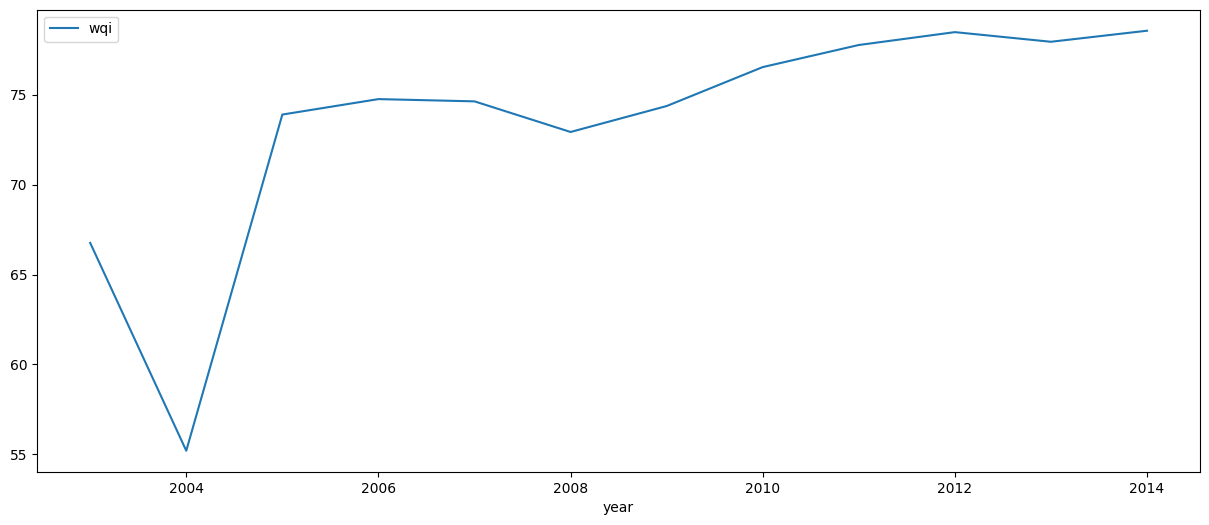

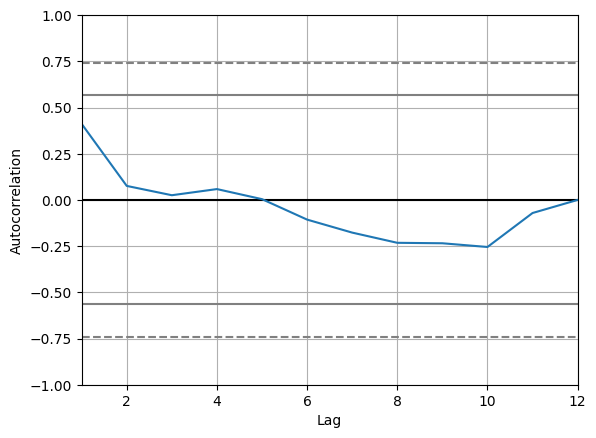

In [83]:
# WaterData Visualization Here
yearly_wqi = yearly_wqi.set_index('year')
yearly_wqi.plot(figsize=(15, 6))
plt.show()

autocorrelation_plot(yearly_wqi)
plt.show()

series = yearly_wqi

In [84]:
# Evaluate an ARIMA model using a walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt


In [85]:
# Split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [86]:
# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(X, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=79.100642, expected=76.534323
predicted=79.100642, expected=77.763256
predicted=79.100642, expected=78.478992
predicted=79.100642, expected=77.942762
predicted=79.100642, expected=78.557253


In [87]:
# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.442


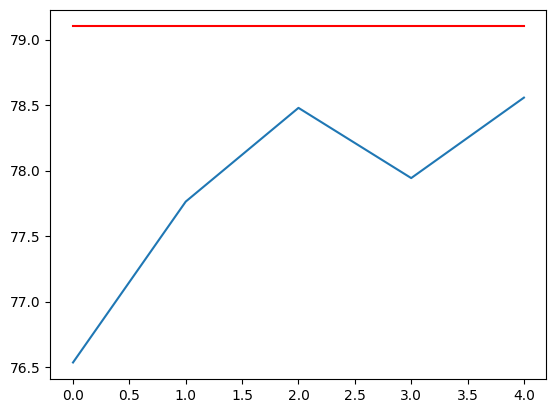

In [88]:
# Plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [89]:
# Fit model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [90]:

# Summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    wqi   No. Observations:                   12
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -34.976
Date:                Mon, 03 Jul 2023   AIC                             81.951
Time:                        14:58:08   BIC                             84.339
Sample:                             0   HQIC                            80.446
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5020      1.315     -0.382      0.703      -3.079       2.075
ar.L2         -0.1288      1.825     -0.071      0.944      -3.705       3.447
ar.L3         -0.1635      2.336     -0.070      0.9

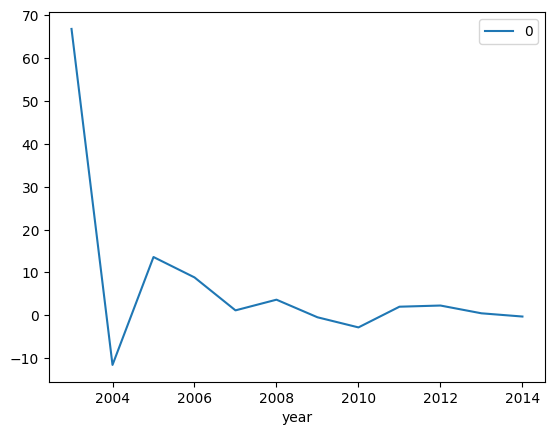

In [91]:
# Line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

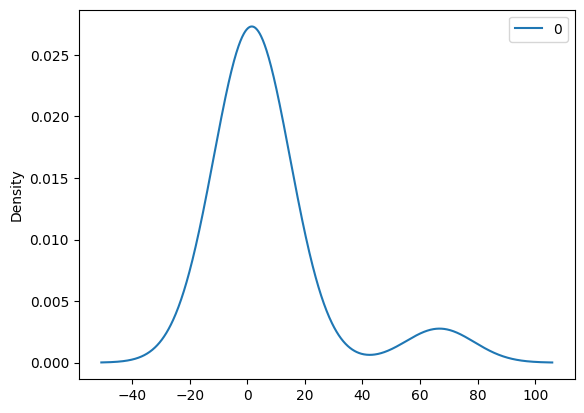

In [92]:
# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [93]:
# Summary stats of residuals
print(residuals.describe())

               0
count  12.000000
mean    6.972068
std    19.776603
min   -11.557842
25%    -0.322558
50%     1.584989
75%     4.946197
max    66.759200
